# 统计学
## 目录
- [概率](#概率)
- [二项分布](#二项分布)
- [条件概率](#条件概率)
- [贝叶斯规则](#贝叶斯规则)
- [抽样分布与中心极限定理](#抽样分布与中心极限定理)
- [置信区间](#置信区间)
- [假设检验](#假设检验)
- [A/B test](#A/B test)
- [回归](#回归)
- [多元线性回归方程](#多元线性回归方程)
- [逻辑回归](#逻辑回归)


<a id='概率'></a>
### 概率
- 事件的概率P
- 若a是A的对立事件，则P(A)=1-P(a)
- 复合事件的概率:如果我们事件是独立的，一系列可能事件的概率是这些事件的乘积。某个事件的概率 AND 下一个事件的概率 AND 下一个事件的概率，即这些事件概率的乘积。

<a id='条件概率'></a>
### 条件概率
P(A ∩ B)=P(A∣B)*P(B)

P(A∣B)= P(A ∩ B)/P(B)

在这节课中你学习到了条件概率。通常事件并不像掷硬币和骰子一样是独立的。实际上，某个事件的结果依赖于之前的事件。

例如，得到阳性检验测试结果的概率依赖于你是否具有某种特殊条件。如果具备条件，测试结果就是阳性的。我们通过以下方式用公式表示任意两个事件的条件概率：

P(positive∣disease)= P(positive ∩ disease)/P(disease)

# Coin Flips and Die Rolls
Use NumPy to create simulations and compute proportions for the following outcomes. The first one is done for you.

In [2]:
# import numpy
import numpy as np

### 1. Two fair coin flips produce exactly two heads

In [3]:
# simulate 1 million tests of two fair coin flips
tests = np.random.randint(2, size=(int(1e6), 2))

# sums of all tests
test_sums = tests.sum(axis=1)

# proportion of tests that produced exactly two heads
(test_sums == 0).mean()

0.250052

In [6]:
tests

array([[1, 1],
       [0, 1],
       [1, 0],
       ..., 
       [1, 1],
       [0, 1],
       [0, 1]])

In [5]:
test_sums

array([2, 1, 1, ..., 2, 1, 1])

### 2. Three fair coin flips produce exactly one head

In [31]:
# simulate 1 million tests of three fair coin flips
tests = np.random.randint(2,size=(int(1e6),3))

# sums of all tests
test_sums = tests.sum(axis=1)
# proportion of tests that produced exactly one head
(test_sums==2).mean()

0.37511699999999998

### 3. Three biased coin flips with P(H) = 0.6 produce exactly one head

In [33]:
# simulate 1 million tests of three bias coin flips
# hint: use np.random.choice()
tests = np.random.choice(2,size=(int(1e6),3),p=[0.6,0.4])

# sums of all tests
test_sums = tests.sum(axis=1)

# proportion of tests that produced exactly one head
(test_sums==2).mean()

0.28772500000000001

### 4. A die rolls an even number

In [37]:
# simulate 1 million tests of one die roll
tests = np.random.randint(6,size=(int(1e6)))

# proportion of tests that produced an even number
(tests%2==0).mean()

0.50032500000000002

### 5. Two dice roll a double

In [47]:
# simulate the first million die rolls
first = np.random.randint(6,size=(int(1e6)))

# simulate the second million die rolls
second = np.random.randint(6,size=(int(1e6)))

# proportion of tests where the 1st and 2nd die rolled the same number
(first==second).mean()

0.166824

<a id='二项分布'></a>
### 二项分布

二项分布 帮助我们决定一系列独立的 '掷硬币等事件' 概率。

与二项分布相关的 概率质量函数 具有以下形式：

P(X=x)=(n!/x!(n-x)!)*p<sup>x</sup>*(1-p)<sup>n-x</sup>

 

其中 n 是事件数量， x 是 "成功" 的数量，p 是 "成功" 的概率。

我们现在可以使用这个分布决定下列事件的概率：

- 掷硬币 10 次出现 3 次正面的概率。
- 掷硬币 10 次出现 8 次以上正面的概率。
- 掷硬币 20 次不出现正面的概率。

# Simulating Many Coin Flips

In [1]:
import numpy as np

In [3]:
# number of heads from 10 fair coin flips
np.random.binomial(10, 0.5)

4

In [4]:
# results from 20 tests with 10 coin flips
np.random.binomial(10, 0.5, 20)

array([6, 3, 7, 6, 6, 7, 7, 7, 5, 3, 4, 5, 3, 7, 3, 4, 9, 6, 2, 4])

In [5]:
# mean number of heads from the 20 tests
np.random.binomial(10, 0.5, 20).mean()

5.0499999999999998

In [6]:
# reflects the fairness of the coin more closely as # tests increases
np.random.binomial(10, 0.5, 1000000).mean()

4.9997210000000001

In [22]:
import matplotlib.pyplot as plt
% matplotlib inline

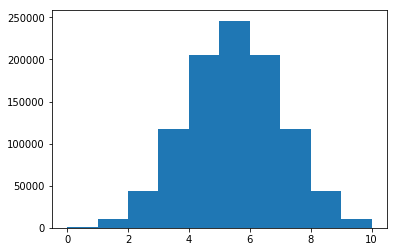

In [27]:
plt.hist(np.random.binomial(10, 0.5, 1000000));

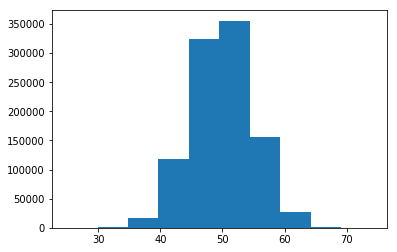

In [29]:
# gets more narrow as number of flips increase per test
plt.hist(np.random.binomial(100, 0.5, 1000000));

# Binomial Distributions
Use NumPy to create simulations and compute proportions for the following outcomes. The first one is done for you.

In [1]:
# import numpy
import numpy as np

### 1. A fair coin flip produces heads

In [2]:
# simulate 1 million tests of one fair coin flip
# remember, the output of these tests are the # successes, or # heads
tests = np.random.binomial(1, 0.5, int(1e6))

# proportion of tests that produced heads
(tests == 1).mean()

0.49980000000000002

### 2. Five fair coin flips produce exactly one head

In [15]:
# simulate 1 million tests of five fair coin flips
tests = np.random.binomial(5,0.5,int(1e6))

# proportion of tests that produced 1 head
(tests==1).mean()

0.156393

### 3. Ten fair coin flips produce exactly four heads

In [26]:
# simulate 1 million tests of ten fair coin flips
tests = np.random.binomial(10,0.5,int(1e6))

# proportion of tests that produced 4 heads
(tests==4).mean()

0.20518900000000001

### 4. Five biased coin flips with P(H) = 0.8 produce exactly five heads

In [20]:
# simulate 1 million tests of five biased coin flips
tests = np.random.binomial(5,0.8,int(1e6))

# proportion of tests that produced 5 heads
(tests==5).mean()

0.32876899999999998

### 5. Ten biased coin flips with P(H) = 0.15 produce 3 heads

In [28]:
# simulate 1 million tests of ten biased coin flips
tests = np.random.binomial(10,0.15,int(1e6))

# proportion of tests that produced at least 3 heads
(tests==3).mean()

0.129721

<a id='贝叶斯规则'></a>
### 贝叶斯规则
贝叶斯定理是关于随机事件A和B的条件概率的一则定理。

P(A|B)=P(A)*P(B|A)/P(B)

其中P(A|B)是指在事件B发生的情况下事件A发生的概率。

在贝叶斯定理中，每个名词都有约定俗成的名称：

- P(A|B)是已知B发生后A的条件概率，也由于得自B的取值而被称作A的后验概率。
- P(A)是A的先验概率。之所以称为"先验"是因为它不考虑任何B方面的因素。
- P(B|A)是已知A发生后B的条件概率，也由于得自A的取值而被称作B的后验概率。
- P(B)是B的先验概率。

# Cancer Test Results

In [42]:
# load dataset
import numpy as np
import pandas as pd
df=pd.read_csv('cancer_test_data.csv')
df.head()

,patient_id,test_result,has_cancer
0,79452,Negative,False
1,81667,Positive,True
2,76297,Negative,False
3,36593,Negative,False
4,53717,Negative,False


In [65]:
# number of patients
num_patients=df.shape[0]
num_patients

2914

In [66]:
# number of patients with cancer
num_c=df.query('has_cancer==True')['has_cancer'].count()
num_c

306

In [67]:
# number of patients without cancer
num_no_c=df.query('has_cancer==False')['has_cancer'].count()
num_no_c

2608

In [68]:
# proportion of patients with cancer
p_c=num_c/num_patients
p_c

0.10501029512697323

In [69]:
# proportion of patients without cancer
p_no_c=num_no_c/num_patients
p_no_c

0.89498970487302676

In [87]:
# proportion of patients with cancer who test positive
df3=df.query('test_result=="Positive"').query('has_cancer==True')\
['test_result'].count()/num_patients
df3/p_c

0.90522875816993464

In [89]:
# proportion of patients with cancer who test negative
df4=df.query('test_result=="Negative"').query('has_cancer==True')\
['test_result'].count()/num_patients
df4/p_c


0.09477124183006537

In [90]:
# proportion of patients without cancer who test positive
df5=df.query('test_result=="Positive"').query('has_cancer==False')\
['test_result'].count()/num_patients
df5/p_c


1.7352941176470589

In [ ]:
# proportion of patients without cancer who test negative
df.query('test_result=="Negative"').query('has_cancer==False')\
['test_result'].count()/\
num_patients

<a id='抽样分布与中心极限定理'></a>
### 抽样分布与中心极限定理

#### 抽样分布
抽样分布 是一个统计量 (任何统计量) 的分布。

抽样分布涉及两个重要数学定理：大数法则 和 中心极限定理。

- **大数法则** 表示随着样本容量增加，样本平均数越来越接近总体平均数。一般来说，如果统计量 "较好地" 估计参数，它会接近较大样本容量的参数。

- **中心极限定理** 表示样本容量足够大，样本平均数会是正态分布，但是在多个样本平均数情况下，它才为真。

#### 自展法
- 自展法 是我们从群组中进行放回抽样的技巧。

- 我们可以使用自展法，模拟在这节课进行多次的创建抽样分布。 

- 通过自展法，计算我们统计量的重复数值，我们可以理解统计中的抽样分布。


<a id='置信区间'></a>
### 置信区间

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(42)

coffee_full = pd.read_csv('coffee_dataset.csv')
coffee_red = coffee_full.sample(200) #this is the only data you might actually get in the real world.

`1.` 样本中喝咖啡的人的比例是多少？不喝咖啡的人的比例是多少？

In [92]:
coffee_red.query('drinks_coffee==True')['drinks_coffee'].count()/\
coffee_red.shape[0], coffee_red.query('drinks_coffee==False')['drinks_coffee'].count()/\
coffee_red.shape[0]

(0.595, 0.405)

`2.` 在喝咖啡的人中，他们的平均身高是多少？在不喝咖啡的人中，他们的平均身高是多少？


In [94]:
coffee_red.query('drinks_coffee==True')['height'].mean(), coffee_red.query('drinks_coffee==False')['height'].mean()

(68.11962990858618, 66.78492279927877)

`3.` 模拟来自200个原始样本的200个“新”个体。在该有放回抽样样本（bootstrap sample）中，喝咖啡的人的比例是多少？不喝咖啡的人的比例是多少？

In [96]:
sample_drinks_coffee=np.random.choice(coffee_full['drinks_coffee'],200).mean()
sample_drinks_coffee

0.57

In [97]:
sample_dont_drinks_coffee=1-sample_drinks_coffee
sample_dont_drinks_coffee

0.43000000000000005

`4.` 现在模拟10,000次有放回抽样，并取每个样本中不喝咖啡的人的平均身高。每个有放回抽样样本应该是从200个数据点中取出的第一个样本。绘制分布图，并拉出95％置信区间所需的值。在这个例子中，关于平均数的抽样分布，你发现了什么？

In [99]:
means=[]
for _ in range(10000):
    sample2=coffee_full.sample(200,replace=True)
    no_drinks_height_mean=sample2.query('drinks_coffee==False')['height'].mean()
    means.append(no_drinks_height_mean)
    

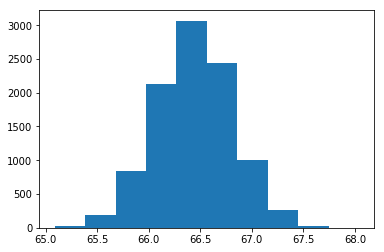

In [100]:
plt.hist(means);

In [101]:
np.percentile(means,2.5),np.percentile(means,97.5)

(65.70858530339736, 67.18698042447546)

<a id='假设检验'></a>
### 假设检验

- 零假设是收集数据前我们假设正确的内容，备择假设是我们想要证明为真的内容。
-  I 类错误和 II 类错误。I 类错误是最严重的错误类型，这与零假设实际为真时选择备择假设相关。
-  p 值是零假设为真的情况下，观察支持备择假设的数据或更极端内容的概率。利用拔靴样本得到的置信区间，可以做出与假设检验相同的决定 (在没有混淆 p 值的情况下)。
- 根据 p 值做出决定。如果 p 值小于 I 类错误阈值，你可以拒绝零假设，选择备择假设。否则，不拒绝零假设。
- 样本容量很大时，任何内容都具有统计意义 (最终拒绝所有零假设)，但这些聚过不具有现实意义。
- 完成多个假设检验时，错误会更加严重。因此使用一些校正法，确保 I 类错误率，非常重要。邦弗朗尼校正是简单且保守的一种方法，你应该用 \alphaα 水平 (或 I 类错误阈值) 除以完成检验的数量。如果你想在 20 个假设检验中把 I 类错误率维持在 1%，邦弗朗尼 校正率应为 0.01/20 = 0.0005。你应该使用这个新比率，对比每 20 个检验的 p 值，做出决定。

`1.` 如果你想知道喝咖啡的人的平均身高是否与不喝咖啡的人的平均身高相等，那么，你的零假设和备择假设是什么？将它们放在下面的单元格中，并使用你的答案来回答下面的第一个测试题目。

- H0:Ucoff-Uno=0
- H1:Ucoff-Uno !=0



`2.` 如果你想知道喝咖啡的人的平均身高是否低于不喝咖啡的人的身高，那么，你的零假设和备择假设是什么？将它们放在下面的单元格中，并使用你的答案来回答下面的第二个测试题目。

- H0:Ucoff-Uno>=0
- H1:Ucoff-Uno<0

`3.` 对于10,000次迭代：自展程序会对样本数据进行抽样，计算喝咖啡的人和不喝咖啡的人的平均身高，并计算每个样本的平均差异。你要在迭代结束时获取三个数组 - 一个是每个平均值，一个是所有平均值的差异。使用你的抽样分布结果，回答下面的第三个测试题目。

In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
np.random.seed(42)

full_data = pd.read_csv('coffee_dataset.csv')
sample_data = full_data.sample(200)

In [110]:
means_drinks,means_no_drinks,diff=[],[],[]

for _ in range(10000):
    sample=full_data.sample(200,replace=True)
    means_d=sample.query('drinks_coffee==True')['height'].mean()
    means_no_d=sample.query('drinks_coffee==False')['height'].mean()
    diff1=means_d-means_no_d
    means_drinks.append(means_d)
    means_no_drinks.append(means_no_d)
    diff.append(diff1)

`4.` 现在，使用你观察到的平均值差异抽样分布以及 [该文档](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.random.normal.html) 来模拟：如果零假设是真的，你会期望抽样分布是什么样的。你可以通过重新定位0点分布来完成这个任务。另外，计算 在`sample_data`中观察到的样本均值差。用你的解决方案来回答下面测试题中的最后一个问题。

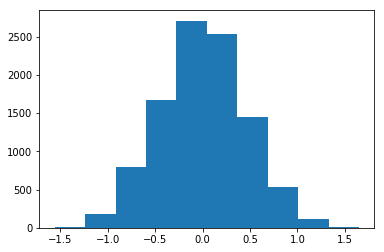

In [112]:
plt.hist(np.random.normal(0,np.std(diff),10000));

`5.` 新的备择假设为样本的平均身高大于70，模拟零假设并观察抽样分布形状得出抽样分布标准差

- H0:u<=70
- H1:u>70

In [115]:
sample_mean=sample_data['height'].mean()
sample_mean

67.57907352931672

In [116]:
sample1=[]
for _ in range(10000):
    sample=sample_data.sample(200,replace=True)
    means1=sample['height'].mean()
    sample1.append(means1)

In [117]:
null_vals=np.random.normal(70,np.std(sample1),10000)

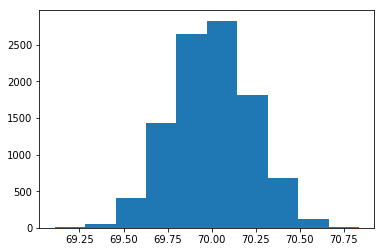

In [120]:
plt.hist(null_vals);

In [118]:
null_mean=70
(null_vals<sample_mean).mean()+(null_vals>null_mean+(null_mean-sample_mean)).mean()

0.0

### 计算误差

以下是两个数据集，分别代表你在本课中看到的两个示例。

一个数据集是基于降落伞的一个案例，第二个是基于法律的一个案例。这两个数据集都不是基于真实的人。


In [121]:
jud_data = pd.read_csv('judicial_dataset_predictions.csv')
par_data = pd.read_csv('parachute_dataset.csv')

`1.` 通过上面，你可以看到每个数据集的实际列和预测列。使用 **jud_data** 找出数据集的误差比例，以及每种类型的误差百分比。使用你的结果来回答下面测试1中的问题。

**测试题目提示:** 误差是指，任何时候，预测值不符合实际值的情况。此外，还有类型I和类型II的误差需要考虑。我们也知道我们可以通过最大化其他类型的误差来最小化某一种类型的误差。如果我们预测所有的个体都是无辜的，那么有多少有罪的人被贴上了错误的标签？同样，如果我们预测所有人都有罪，那么有多少无辜的人被贴上了错误的标签？

In [123]:
# I类错误：
#actual：innocent
#predicted: guilty
jud_data.query("actual=='innocent' and predicted=='guilty'").shape[0]/\
jud_data.shape[0]

0.001510366607167376

In [124]:
# II类错误：
#actual：guilty
#predicted: innocent
jud_data.query("actual=='guilty' and predicted=='innocent'").shape[0]/\
jud_data.shape[0]

0.04064259233832212

In [125]:
jud_data.query('actual=="innocent"').shape[0]/jud_data.shape[0]

0.45159961554304545

<a id='A/B test'></a>
### A/B test
A/B 测试用于测试网页的修改效果，测试需进行一场实验，实验中对照组为网页旧版本，实验组为网页新版本，实验还需选出一个指标 来衡量每组用户的参与度，然后根据实验结果来判断哪个版本效果更好。从以下假设来看，A/B 测试很像假设检验：

- 零假设： 新版本不比旧版本好，甚至比旧版本差
- 对立假设：新版本比旧版本好
如果我们无法推翻零假设，那得到的实验结果就会暗示我们得保留旧版本；如果我们推翻了零假设，那得到的实验结果就会暗示我们可实现网页改动。通过这些测试，我们可以观察什么样的改动能最大化指标，测试适用的改动类型十分广泛，上到增加元素的大改动，下到颜色小变动都可使用这些测试。

但 A/B 测试也有不足之处。虽然测试能帮你比较两种选择，但无法告诉你你还没想到的选择，在对老用户进行测试时，抗拒改变心理、新奇效应等因素都可能使测试结果出现偏差。

- 抗拒改变心理：老用户可能会因为纯粹不喜欢改变而偏爱旧版本，哪怕从长远来看新版本更好。
- 新奇效应：老用户可能会觉得变化很新鲜，受变化吸引而偏爱新版本，哪怕从长远看来新版本并无益处。

分析 A/B 测试结果涉及的操作：

- 我们计算了对照组和实验组的指标观察差异，即点击率；
- 我们为平均差（即点击率之差）建立了抽样分布模型；
- **我们用这个抽样分布模型来为 零假设分布 建立模型，也即创建了一个随机正态分布模型，模型以 0 为中心，大小和宽度与抽样分布的一样；**
- 我们找出了零假设分布中大于观察差异的那部分比值，从而算出了p 值；
- 我们用 p 值来确定观察差异是否具有统计显著性。

#### 试验一：点击率

In [129]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
df = pd.read_csv('homepage_actions.csv')
df.head()

,timestamp,id,group,action
0,2016-09-24 17:42:27.839496,804196,experiment,view
1,2016-09-24 19:19:03.542569,434745,experiment,view
2,2016-09-24 19:36:00.944135,507599,experiment,view
3,2016-09-24 19:59:02.646620,671993,control,view
4,2016-09-24 20:26:14.466886,536734,experiment,view


### 1. Match the following characteristics of this dataset: 
- total number of actions
- number of unique users
- sizes of the control and experiment groups (i.e., the number of unique users in each group)

In [2]:
# total number of actions
df.shape

(8188, 4)

In [3]:
df['action'].value_counts()

view     6328
click    1860
Name: action, dtype: int64

In [4]:
# number of unique users
df['id'].nunique()

6328

In [5]:
# size of control group and experiment group
df.groupby('group')['id'].nunique()

group
control       3332
experiment    2996
Name: id, dtype: int64

### 2. How long was the experiment run for? 
Hint: the records in this dataset are ordered by timestamp in increasing order

In [6]:
# duration of this experiment
df['timestamp']=pd.to_datetime(df['timestamp'])
diff=df['timestamp'].max()-df['timestamp'].min()
diff

Timedelta('115 days 16:41:40.789831')

### 3. What action types are recorded in this dataset?
(i.e., What are the unique values in the action column?)

In [7]:
# action types in this experiment
df.query('group=="experiment"')['action'].value_counts()

view     2996
click     928
Name: action, dtype: int64

### 6. What are the null and alternative hypotheses?
Use $CTR_{old}$ and $CTR_{new}$ in your hypotheses.

- H0:CTR_new-CTR_old<=0
- H1:CTR_new-CTR_old>0

In [23]:
ctr_new=df.query('group=="experiment" and action=="click"')['id'].nunique()/\
df.query('group=="experiment"')['id'].nunique()


In [24]:
ctr_old=df.query('group=="control" and action=="click"')['id'].nunique()/\
df.query('group=="control"')['id'].nunique()

In [26]:
diff=ctr_new-ctr_old
diff

0.030034443684015644

In [130]:
diff1=[]
for _ in range(10000):
    sample1=df.sample(df.shape[0],replace=True)
    ctr_new=sample1.query('group=="experiment" and action=="click"')['id']\
    .nunique()/sample1.query('group=="experiment"')['id'].nunique()
    ctr_old=sample1.query('group=="control" and action=="click"')['id']\
    .nunique()/sample1.query('group=="control"')['id'].nunique()
    diff_test=ctr_new-ctr_old
    diff1.append(diff_test)

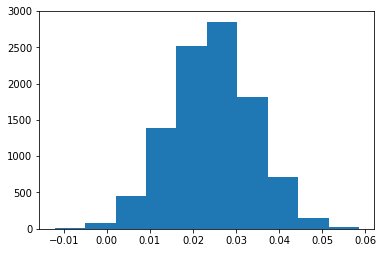

In [39]:
plt.hist(diff1);

In [49]:
null_std=np.std(diff1)

In [56]:
null_mean=0
null_values=np.random.normal(0,null_std,10000)

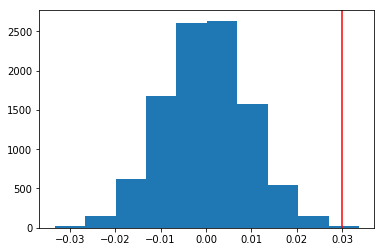

In [57]:
plt.hist(null_values);
plt.axvline(x=diff,color='red');

In [53]:
#HO new-old<=0
#H1 new-old>0

In [60]:
p=(null_values>diff).mean()
p

0.00059999999999999995

In [61]:
#p <0.05,拒绝原假设

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

np.random.seed(42)

#### 试验二：注册率

In [5]:
df = pd.read_csv('course_page_actions.csv')
df.head()

,timestamp,id,group,action,duration
0,2016-09-24 17:14:52.012145,261869,experiment,view,130.545004
1,2016-09-24 18:45:09.645857,226546,experiment,view,159.862440
2,2016-09-24 19:16:21.002533,286353,experiment,view,79.349315
3,2016-09-24 19:43:06.927785,842279,experiment,view,55.536126
4,2016-09-24 21:08:22.790333,781883,experiment,view,204.322437


In [26]:
# Get dataframe with all records from control group
control_df = df.query('group == "control"')

# Compute click through rate for control group
control_ctr = control_df.query('action == "enroll"').count()[0] / control_df.query('action == "view"').count()[0]

# Display click through rate
control_ctr

0.23452157598499063

In [27]:
# Get dataframe with all records from experiment group
experiment_df=df.query('group=="experiment"')
# Compute click through rate for experiment group
experiment_ctr = experiment_df.query('action=="enroll"').count()[0]/\
                 experiment_df.query('action=="view"').count()[0]
# Display click through rate
experiment_ctr

0.26429861529199278

In [28]:
df.query('group=="experiment" and action=="enroll"').count()[0]/\
df.query('group=="experiment" and action=="view"').count()[0]

0.26429861529199278

In [29]:
# Compute the observed difference in click through rates
obs_diff = experiment_ctr-control_ctr

# Display observed difference
obs_diff

0.029777039307002151

In [20]:
# Create a sampling distribution of the difference in proportions
# with bootstrapping
diffs = []
size = df.shape[0]
for _ in range(10000):
    b_samp = df.sample(size, replace=True)
    control_df = b_samp.query('group == "control"')
    experiment_df = b_samp.query('group == "experiment"')
    control_ctr = control_df.query('action == "enroll"').count()[0] / control_df.query('action == "view"').count()[0]
    experiment_ctr = experiment_df.query('action == "enroll"').count()[0] / experiment_df.query('action == "view"').count()[0]
    diffs.append(experiment_ctr - control_ctr)


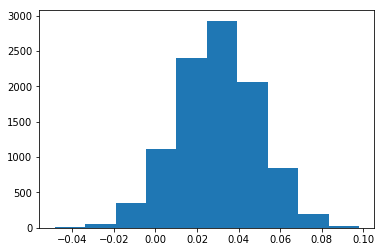

In [22]:
# Convert to numpy array


# Plot sampling distribution
plt.hist(diffs);

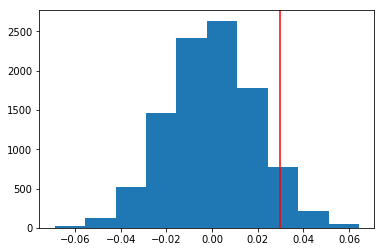

In [24]:
# Simulate distribution under the null hypothesis
null_vals = np.random.normal(0,np.std(diffs),10000)

# Plot the null distribution
plt.hist(null_vals);
plt.axvline(x=obs_diff,color='red');

In [ ]:
# Plot observed statistic with the null distibution

In [25]:
# Compute p-value
# H0: enroll_new-enroll_old<=0
# H1: enroll_new-enroll_old>0
(null_vals>obs_diff).mean()

0.063200000000000006

#### 试验三：平均浏览时长

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

np.random.seed(42)

In [2]:

df = pd.read_csv('classroom_actions.csv')
df.head()

,timestamp,id,group,total_days,completed
0,2015-08-10 17:06:01.032740,610019,experiment,97,True
1,2015-08-10 17:15:28.950975,690224,control,75,False
2,2015-08-10 17:34:40.920384,564994,experiment,128,True
3,2015-08-10 17:50:39.847374,849588,experiment,66,False
4,2015-08-10 19:10:40.650599,849826,experiment,34,False


In [3]:
# The total_days represents the total amount of time
# each student has spent in classroom.
# get the average classroom time for control group
control_mean = df.query('group=="control"').total_days.mean()

# get the average classroom time for experiment group
experiment_mean = df.query('group=="experiment"').total_days.mean()

# display average classroom time for each group
control_mean, experiment_mean

(73.368990384615387, 74.671593533487297)

In [5]:
# compute observed difference in classroom time
obs_diff = experiment_mean-control_mean

# display observed difference
obs_diff

1.3026031488719099

In [8]:
# create sampling distribution of difference in average classroom times
# with boostrapping
diffs = []
for _ in range(10000):
    sample1=df.sample(df.shape[0],replace=True)
    control_mean1=sample1.query('group=="control"').total_days.mean()
    experiment_mean1 =sample1.query('group=="experiment"').total_days.mean()
    diff1=experiment_mean1-control_mean1
    diffs.append(diff1)
    
    

In [ ]:
# convert to numpy array


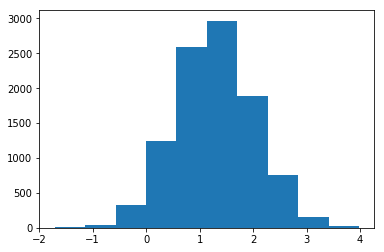

In [9]:
# plot sampling distribution
plt.hist(diffs);

In [11]:
# simulate distribution under the null hypothesis
null_vals = np.random.normal(0,np.std(diffs),10000)

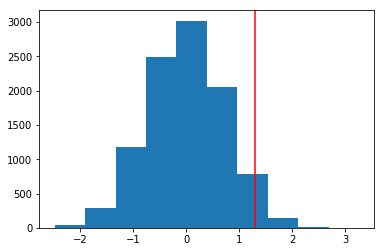

In [13]:
# plot null distribution
plt.hist(null_vals);

# plot line for observed statistic
plt.axvline(x=obs_diff,color='red');

In [14]:
# compute p value
(null_vals>obs_diff).mean()

0.038399999999999997

#### 试验四：完成率

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

np.random.seed(42)

In [2]:
df = pd.read_csv('classroom_actions.csv')
df.head()

,timestamp,id,group,total_days,completed
0,2015-08-10 17:06:01.032740,610019,experiment,97,True
1,2015-08-10 17:15:28.950975,690224,control,75,False
2,2015-08-10 17:34:40.920384,564994,experiment,128,True
3,2015-08-10 17:50:39.847374,849588,experiment,66,False
4,2015-08-10 19:10:40.650599,849826,experiment,34,False


In [18]:
df.shape

(3829, 5)

In [5]:
# Create dataframe with all control records
control_df = df.query('group=="control"')

# Compute completion rate
control_ctr = control_df.query('completed==True').count()[0]/\
              control_df.count()[0]

# Display completion rate
control_ctr

0.37199519230769229

In [8]:
# Create dataframe with all experiment records
experiment_df = df.query('group=="experiment"')

# Compute completion rate
experiment_ctr = experiment_df.query('completed==True').count()[0]/\
experiment_df.count()[0]

# Display completion rate
experiment_ctr

0.39353348729792148

In [9]:
# Compute observed difference in completion rates
obs_diff = experiment_ctr-control_ctr

# Display observed difference in completion rates
obs_diff

0.02153829499022919

In [10]:
# Create sampling distribution for difference in completion rates
# with boostrapping
diffs = []
for _ in range(10000):
    sample1=df.sample(df.shape[0],replace=True)
    control_df1 = sample1.query('group=="control"')
    control_ctr1 = control_df.query('completed==True').count()[0]/\
              control_df.count()[0]
    experiment_df1 = sample1.query('group=="experiment"')
    experiment_ctr1 = experiment_df1.query('completed==True').count()[0]/\
              experiment_df.count()[0]
    diffs1=experiment_ctr1-control_ctr1
    diffs.append(diffs1)

In [29]:
# convert to numpy array
diffs = np.array(diffs)

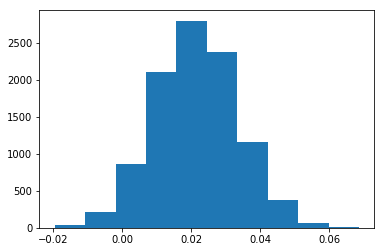

In [24]:
# plot distribution
plt.hist(diffs);

In [25]:
# create distribution under the null hypothesis
null_vals = np.random.normal(0,np.std(diffs),3289)

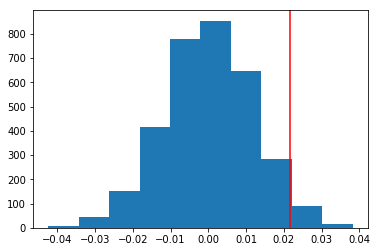

In [26]:
# plot null distribution

plt.hist(null_vals);
# plot line for observed statistic
plt.axvline(x=obs_diff,color='r');

In [27]:
# compute p value
(null_vals>obs_diff).mean()

0.035573122529644272

**A/B 测试难点**

正如你在上述情景看到的，设计 A/B 测试、基于测试结果得出结论都需要考虑诸多因素。下方总结了一些常见考虑因素：

- 老用户第一次体验改动会有新奇效应和改变抗拒心理；
- 要得到可靠的显著结果，需要有足够的流量和转化率；
- 要做出最佳决策，需选用最佳指标（如营收 vs 点击率）；
- 应进行足够的实验时长，以便解释天/周/季度事件引起的行为变化；
- 转化率需具备现实指导意义（推出新元素的开支 vs 转化率提高带来的效益）；
- 对照组和实验组的测试对象要有一致性（两组样本数失衡会造成辛普森悖论等现象的发生）。

<a id=‘回归’ ></a>
### 回归
**反应** 变量是你想预测的变量，**解释**变量则是用于预测反应变量的变量，在线性回归中，通常我们会用散点图来可视化两个变量的关系，你将在接下来的各种概念中进一步了解这一点。

##### 散点图
散点图是比较两个定量变量的常用可视化手段。散点图常用的汇总统计是 **相关系数**，该系数常以 **r** 来表示。

虽然还有其它几种办法来衡量两个变量之间的相关性，但最常用的办法是用皮尔逊相关系数，该系数能说明 线性关系 的：

- 相关程度
- 相关方向

##### 相关系数
相关系数是 线性关系 相关程度 和 相关方向 的一种衡量方式。

我们可以根据相关性是正还是负来判断相关方向。

判断相关程度的小窍门：

- 强：0.7<=|r|<=1.0
- 中：0.3<=|r|<0.7
- 弱：0.0<=|r|<=0.3

### 住房分析

在本 notebook 中，你将使用下面显示的房屋数据复制本课中所见的大部分内容。

完成这个 notebook 和随后的一系列测试题目后，你需要通过利用一些新的数据集，尝试使用你的技能来进行一些额外的练习。  **你可以忽略运行IN [1]: 单元格里的 import 后弹出的版本更新警告**。

In [138]:
import numpy as np
import pandas as pd
import statsmodels.api as sm;

df = pd.read_csv('./house_price_area_only.csv')
df.head()

/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


,price,area
0,598291,1188
1,1744259,3512
2,571669,1134
3,493675,1940
4,1101539,2208


`1.` 使用 [这里](http://www.statsmodels.org/dev/regression.html) 的文件和 **statsmodels** 库来拟合一个线性模型，用来预测基于 **area** 的 **price** 。获得一个结果摘要，并用它们回答以下的测试题目。不要忘记添加一个截距。

In [139]:
df['intercept']=1

In [140]:
df['intercept']=1
mod=sm.OLS(df['price'],df[['intercept','area']])
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                 1.269e+04
Date:                Sun, 17 Jun 2018   Prob (F-statistic):               0.00
Time:                        16:26:56   Log-Likelihood:                -84517.
No. Observations:                6028   AIC:                         1.690e+05
Df Residuals:                    6026   BIC:                         1.691e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   9587.8878   7637.479      1.255      0.209   -5384.303    2.46e+04
area         348.4664      3.093    112.662      0.000     342.403     354.530
==============================================================================
Omnibus:                      368.609   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              349.279
Skew:                           0.534   Prob(JB):                     1.43e-76
Kurtosis:                       2.499   Cond. No.                     4.93e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.93e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

回归方程summary系数的p值是指该系数零假设为零前提下观察样本系数统计量的概率

<a id='多元线性回归方程'></a>
### 多元线性回归方程
拟合多元线性回归方程

In [144]:
import numpy as np
import pandas as pd
import statsmodels.api as sms;

df = pd.read_csv('./house_prices.csv')
df.head()

,house_id,neighborhood,area,bedrooms,bathrooms,style,price
0,1112,B,1188,3,2,ranch,598291
1,491,B,3512,5,3,victorian,1744259
2,5952,B,1134,3,2,ranch,571669
3,3525,A,1940,4,2,ranch,493675
4,5108,B,2208,6,4,victorian,1101539


`1.` 使用 statsmodels，拟合三个单独的简单线性回归模型来预测价格。 在这三个模型中，应有一个使用 **area** ，一个使用 **bedrooms** ，另一个使用 **bathrooms** 。另外，每个模型中都要使用一个截距。 

使用每个模型的结果来回答下面的前两个测试题目。

`2.` 你已经看到了简单线性回归模型的结果，接下来，让我们同时使用这三个变量尝试一个多元线性回归模型。在这个模型中，做一个截距。

`3.` 除了使用 **area** 、 **bedrooms** 与 **bathrooms** ，你可能还想使用 **style** 来预测房屋价格。尝试把它添加到你的多元线性回归模型中吧。你得到了什么结果？通过下面的最后一道测试题目给出你的答案吧。

In [13]:
df['intercept']=1
mod=sms.OLS(df['price'],df[['intercept','area']])
result=mod.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                 1.269e+04
Date:                Wed, 13 Jun 2018   Prob (F-statistic):               0.00
Time:                        06:11:39   Log-Likelihood:                -84517.
No. Observations:                6028   AIC:                         1.690e+05
Df Residuals:                    6026   BIC:                         1.691e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   9587.8878   7637.479      1.255      0.209   -5384.303    2.46e+04
area         348.4664      3.093    112.662      0.000     342.403     354.530
==============================================================================
Omnibus:                      368.609   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              349.279
Skew:                           0.534   Prob(JB):                     1.43e-76
Kurtosis:                       2.499   Cond. No.                     4.93e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.93e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
df['intercept']=1
mod=sms.OLS(df['price'],df[['intercept','bedrooms']])
result=mod.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.553
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     7446.
Date:                Wed, 13 Jun 2018   Prob (F-statistic):               0.00
Time:                        06:11:55   Log-Likelihood:                -85509.
No. Observations:                6028   AIC:                         1.710e+05
Df Residuals:                    6026   BIC:                         1.710e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -9.485e+04   1.08e+04     -8.762      0.000   -1.16e+05   -7.36e+04
bedrooms    2.284e+05   2646.744     86.289      0.000    2.23e+05    2.34e+05
==============================================================================
Omnibus:                      967.118   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1599.431
Skew:                           1.074   Prob(JB):                         0.00
Kurtosis:                       4.325   Cond. No.                         10.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
df['intercept']=1
mod=sms.OLS(df['price'],df[['intercept','bathrooms']])
result=mod.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.541
Model:                            OLS   Adj. R-squared:                  0.541
Method:                 Least Squares   F-statistic:                     7116.
Date:                Wed, 13 Jun 2018   Prob (F-statistic):               0.00
Time:                        06:12:18   Log-Likelihood:                -85583.
No. Observations:                6028   AIC:                         1.712e+05
Df Residuals:                    6026   BIC:                         1.712e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   4.314e+04   9587.189      4.500      0.000    2.43e+04    6.19e+04
bathrooms   3.295e+05   3905.540     84.358      0.000    3.22e+05    3.37e+05
==============================================================================
Omnibus:                      915.429   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1537.531
Skew:                           1.010   Prob(JB):                         0.00
Kurtosis:                       4.428   Cond. No.                         5.84
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
mod=sms.OLS(df['price'],df[['intercept','area','bedrooms','bathrooms']])

In [11]:
result=mod.fit()

In [12]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     4230.
Date:                Wed, 13 Jun 2018   Prob (F-statistic):               0.00
Time:                        06:04:27   Log-Likelihood:                -84517.
No. Observations:                6028   AIC:                         1.690e+05
Df Residuals:                    6024   BIC:                         1.691e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.007e+04   1.04e+04      0.972      0.331   -1.02e+04    3.04e+04
area         345.9110      7.227     47.863      0.000     331.743     360.079
bedrooms   -2925.8063   1.03e+04     -0.285      0.775    -2.3e+04    1.72e+04
bathrooms   7345.3917   1.43e+04      0.515      0.607   -2.06e+04    3.53e+04
==============================================================================
Omnibus:                      367.658   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              350.116
Skew:                           0.536   Prob(JB):                     9.40e-77
Kurtosis:                       2.503   Cond. No.                     1.16e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.16e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 虚拟变量

你在前面的 notebook 中已经看到了，你无法直接将分类变量添加到多重线性回归模型中。在这个 notebook 中，你会进行一些练习，学习如何在模型中添加虚拟变量并解释输出。

首先，让我们导入必要的库和数据，然后开始你的任务吧。

In [27]:
import numpy as np
import pandas as pd
import statsmodels.api as sm;
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('./house_prices.csv')
df.head()

,house_id,neighborhood,area,bedrooms,bathrooms,style,price
0,1112,B,1188,3,2,ranch,598291
1,491,B,3512,5,3,victorian,1744259
2,5952,B,1134,3,2,ranch,571669
3,3525,A,1940,4,2,ranch,493675
4,5108,B,2208,6,4,victorian,1101539


`1.` 使用 [pd.get_dummies](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html) 文档帮助你获取 **相邻** 列的虚拟变量。然后，使用 [join](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) 将虚拟变量添加在数据帧中，即 **df**，并将连接结果集存储在 **df_new** 中。

使用所有三个相邻邻域的线性模型来预测价格。使用 **所有三级** **相邻** 邻域拟合一个线性模型来来预测价格。不要忘记添加一个截距。

使用你的结果来回答下面的测试1中的问题。

`2.`  现在，使用 **邻域** 拟合一个合适的线性模型来预测一个房屋的价格。用 **邻域 A** 当做你的基线。使用你的结果模型来回答下面的测试2与测试3中的问题。

`3.` 3.运行下面的两个单元格来查看邻域 **A** 与 **C** 的房价。添加一个邻域 **B**。 这样，你可以大致了解在以前的线性模型中发现的差异。

In [28]:
df['neighborhood'].value_counts()

B    2427
A    1876
C    1725
Name: neighborhood, dtype: int64

In [29]:
df[['A','B','C']]=pd.get_dummies(df['neighborhood'])

In [30]:
df_new=df

In [31]:
df_new['intercept']=1
mod=sm.OLS(df_new['price'],df_new[['intercept','B','C']])

In [32]:
results=mod.fit()

In [33]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.246
Model:                            OLS   Adj. R-squared:                  0.246
Method:                 Least Squares   F-statistic:                     983.1
Date:                Wed, 13 Jun 2018   Prob (F-statistic):               0.00
Time:                        07:45:14   Log-Likelihood:                -87082.
No. Observations:                6028   AIC:                         1.742e+05
Df Residuals:                    6025   BIC:                         1.742e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   5.411e+05   1.05e+04     51.537      0.000    5.21e+05    5.62e+05
B           5.295e+05    1.4e+04     37.870      0.000    5.02e+05    5.57e+05
C           -332.3594   1.52e+04     -0.022      0.983   -3.01e+04    2.94e+04
==============================================================================
Omnibus:                      689.315   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1154.155
Skew:                           0.793   Prob(JB):                    2.39e-251
Kurtosis:                       4.442   Cond. No.                         3.88
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

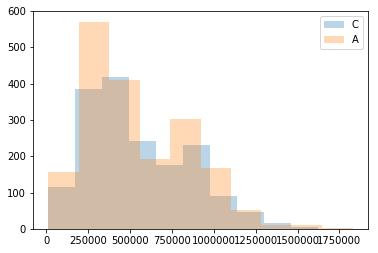

In [34]:
plt.hist(df_new.query("C == 1")['price'], alpha = 0.3, label = 'C');
plt.hist(df_new.query("A == 1")['price'], alpha = 0.3, label = 'A');

plt.legend();

`4.` 现在，添加虚拟变量的房屋 **style** 以及 **邻域**。  使用 **ranch** 作为 **style** 的基线。另外，为你的线性模型添加 **bathrooms** 与 **bedrooms** 。 不要忘记添加一个截距。使用线性模型的结果来回答下面的最后两个问题。 **房价是用美元衡量的，而且这个数据集不是真实的。**

为了使 scrolling 最小化，可以打开另一个浏览器窗口来回答测试题目。

In [35]:
df['style'].value_counts()

victorian    2997
ranch        1802
lodge        1229
Name: style, dtype: int64

In [36]:
df[['victorian','ranch','lodge']]=pd.get_dummies(df['style'])

In [48]:

mod=sm.OLS(df['price'],df[['intercept','B','C','victorian','lodge','bathrooms','bedrooms']])
results=mod.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     4250.
Date:                Wed, 13 Jun 2018   Prob (F-statistic):               0.00
Time:                        07:58:15   Log-Likelihood:                -82944.
No. Observations:                6028   AIC:                         1.659e+05
Df Residuals:                    6021   BIC:                         1.659e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -3.833e+05    1.2e+04    -31.995      0.000   -4.07e+05    -3.6e+05
B           5.229e+05   7040.928     74.271      0.000    5.09e+05    5.37e+05
C          -7168.6285   7639.254     -0.938      0.348   -2.21e+04    7807.045
victorian   1.685e+05   9906.629     17.012      0.000    1.49e+05    1.88e+05
lodge       7.056e+04   8337.790      8.463      0.000    5.42e+04    8.69e+04
bathrooms   9.996e+04   1.09e+04      9.164      0.000    7.86e+04    1.21e+05
bedrooms    1.732e+05   7677.152     22.558      0.000    1.58e+05    1.88e+05
==============================================================================
Omnibus:                      978.611   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2926.472
Skew:                           0.848   Prob(JB):                         0.00
Kurtosis:                       5.962   Cond. No.                         25.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
df['style'].value_counts()

victorian    2997
ranch        1802
lodge        1229
Name: style, dtype: int64

### 多重共线性 & VIF

 如果我们的自变量彼此相关，就会出现多重共线性。多重共线性的一个主要问题在于：它会导致简单线性回归系数偏离我们想要的方向。方差膨胀因子（Variance Inflation Factor，VIF）：是指解释变量之间存在多重共线性时的方差与不存在多重共线性时的方差之比。容忍度的倒数，VIF越大，显示共线性越严重。经验判断方法表明：当0<VIF<10，不存在多重共线性；当10≤VIF<100，存在较强的多重共线性；当VIF≥100，存在严重多重共线性

要判断是否有多重共线性，最常见的办法是借助二变量图或 方差膨胀因子 (即 VIFs)。

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from patsy import dmatrices
import statsmodels.api as sm;
from statsmodels.stats.outliers_influence import variance_inflation_factor
%matplotlib inline

df = pd.read_csv('./house_prices.csv')
df.head()

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


,house_id,neighborhood,area,bedrooms,bathrooms,style,price
0,1112,B,1188,3,2,ranch,598291
1,491,B,3512,5,3,victorian,1744259
2,5952,B,1134,3,2,ranch,571669
3,3525,A,1940,4,2,ranch,493675
4,5108,B,2208,6,4,victorian,1101539


`1.`使用 [seaborn](https://seaborn.pydata.org/examples/scatterplot_matrix.html) 通过运行下面的单元格来查看数据集中所有定量与解释变量的对应关系。你也可以尝试为 style 或 neighborhood 添加颜色 (**hue**) 。

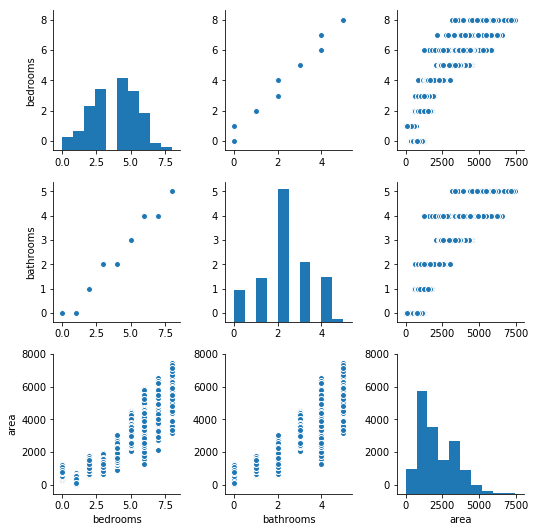

In [2]:
sns.pairplot(df[['bedrooms', 'bathrooms', 'area']]);

`2.`  首先，你可以在每个预测变量和价格之间拟合线性模型，并在多重线性回归模型中使用所有变量和价格。每个模型都显示出一种正相关——也就是说，当浴室、卧室或面积增加时，我们预测，房屋价格会上涨。

使用房屋 **price** 、**bedrooms** 、 **bathrooms** 与 **area** 拟合一个线性模型。使用摘要回答下面的第二个测试题目。 **不要忘了添加一个截距。 **

In [4]:
df['intercept']=1
mod=sm.OLS(df['price'],df[['intercept','area','bedrooms','bathrooms']])
results=mod.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     4230.
Date:                Thu, 14 Jun 2018   Prob (F-statistic):               0.00
Time:                        04:30:01   Log-Likelihood:                -84517.
No. Observations:                6028   AIC:                         1.690e+05
Df Residuals:                    6024   BIC:                         1.691e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.007e+04   1.04e+04      0.972      0.331   -1.02e+04    3.04e+04
area         345.9110      7.227     47.863      0.000     331.743     360.079
bedrooms   -2925.8063   1.03e+04     -0.285      0.775    -2.3e+04    1.72e+04
bathrooms   7345.3917   1.43e+04      0.515      0.607   -2.06e+04    3.53e+04
==============================================================================
Omnibus:                      367.658   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              350.116
Skew:                           0.536   Prob(JB):                     9.40e-77
Kurtosis:                       2.503   Cond. No.                     1.16e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.16e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

`3.` 计算模型中每个变量的 VIF。在下面的测试3中给出关于你的 VIF 结果的见解。 [这里](https://etav.github.io/python/vif_factor_python.html) 有一篇有用的文章，想要了解的话，可以点击进行阅读。

In [11]:
y,x=dmatrices('price ~ + area + bedrooms + bathrooms', df, return_type='dataframe')

In [15]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["features"] = x.columns

In [23]:
vif

,VIF Factor,features
0,7.327102,Intercept
1,5.458190,area
2,20.854484,bedrooms
3,19.006851,bathrooms





`4.` 从上面的模型中移除 bathrooms。 重新设置多重线性回归模型并重新计算 VIF。 在下面的最后一个测试题目中给出关于你对该结果的看法。

In [24]:
mod=sm.OLS(df['price'],df[['intercept','area','bedrooms']])
results=mod.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     6345.
Date:                Thu, 14 Jun 2018   Prob (F-statistic):               0.00
Time:                        04:44:06   Log-Likelihood:                -84517.
No. Observations:                6028   AIC:                         1.690e+05
Df Residuals:                    6025   BIC:                         1.691e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   7857.4509   9425.288      0.834      0.405   -1.06e+04    2.63e+04
area         346.4458      7.152     48.443      0.000     332.426     360.466
bedrooms    1626.8306   5191.702      0.313      0.754   -8550.763    1.18e+04
==============================================================================
Omnibus:                      368.146   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              350.224
Skew:                           0.535   Prob(JB):                     8.91e-77
Kurtosis:                       2.502   Cond. No.                     6.45e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.45e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 系数解释

你不仅要能够拟合复杂的线性模型，还可以知道哪些变量是可以解释的，这一点很重要。

在该 notebook 中，你将拟合几种不同的模型，并在可能的情况下使用下面的测试题将适当的解释与你的系数相匹配。

在某些情况下，你的线性回归模型的系数将不会被保留，因为缺乏重要性，这不是该 notebook 的目的 。**这一点需要严格执行，从而确保你很好地理解解释系数（当它们是可以解释的时候）的方法。**

In [3]:
import numpy as np
import pandas as pd
import statsmodels.api as sm;

df = pd.read_csv('./house_prices.csv')
df.head()

,house_id,neighborhood,area,bedrooms,bathrooms,style,price
0,1112,B,1188,3,2,ranch,598291
1,491,B,3512,5,3,victorian,1744259
2,5952,B,1134,3,2,ranch,571669
3,3525,A,1940,4,2,ranch,493675
4,5108,B,2208,6,4,victorian,1101539


我们将在整个 notebook 上为这个数据集拟合许多不同的模型。 每个模型都有一个测试题目，这些题目可以让你将模型系数的解释与相应的值相匹配。 当然，如果没有’好’的解释的话，这也是选择之一！

### 模型 1

`1.` 对于第一个模型，通过使用一个房屋的 `neighborhood`、 `style` 与 `area` 拟合一个模型来预测 `price`  。使用输出，将正确的值与下面测试1中的相应解释相匹配。不要忘记添加一个截距！ 你还需要构建虚拟变量，并且在拟合线性模型时不要忘记删除其中一列。在第一个测试题目中，通过将基线创建 邻域 **C** 与房屋 style **lodge**，将系数解释与第一个测验中的值联系起来可能是最容易的。 

### 模型 2

`2.` 现在我们来试一下预测价格的第二个模型。这一次，我们使用 `area` 与 `area squared` 来预测价格，同时也要用到房屋的 `style` 。你需要再次需要使用虚拟变量，并在模型中添加一个截距。使用模型的结果来回答第二个与第三个测试题目。

In [4]:
df['neighborhood'].value_counts(),df['style'].value_counts()

(B    2427
 A    1876
 C    1725
 Name: neighborhood, dtype: int64, victorian    2997
 ranch        1802
 lodge        1229
 Name: style, dtype: int64)

In [5]:
df[['A','B','C']]=pd.get_dummies(df['neighborhood'])
df[['victorian','ranch','lodge']]=pd.get_dummies(df['style'])

In [6]:
df['intercept']=1
mod=sm.OLS(df['price'],df[['intercept','area','B','C','ranch','lodge']])
results=mod.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                 1.372e+04
Date:                Thu, 14 Jun 2018   Prob (F-statistic):               0.00
Time:                        06:30:38   Log-Likelihood:                -80348.
No. Observations:                6028   AIC:                         1.607e+05
Df Residuals:                    6022   BIC:                         1.607e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -1.985e+05   5425.043    -36.590      0.000   -2.09e+05   -1.88e+05
area         348.7375      2.205    158.177      0.000     344.415     353.060
B           5.245e+05   4575.989    114.611      0.000    5.15e+05    5.33e+05
C            194.2464   4965.459      0.039      0.969   -9539.832    9928.324
ranch      -1974.7032   5757.527     -0.343      0.732   -1.33e+04    9312.111
lodge      -6262.7365   6893.293     -0.909      0.364   -1.98e+04    7250.586
==============================================================================
Omnibus:                      114.369   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              139.082
Skew:                           0.271   Prob(JB):                     6.29e-31
Kurtosis:                       3.509   Cond. No.                     1.11e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.11e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [8]:
df['area_squared']=df['area']*df['area']
mod=sm.OLS(df['price'],df[['intercept','area','area_squared','ranch','lodge']])
results=mod.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     3173.
Date:                Thu, 14 Jun 2018   Prob (F-statistic):               0.00
Time:                        06:30:57   Log-Likelihood:                -84516.
No. Observations:                6028   AIC:                         1.690e+05
Df Residuals:                    6023   BIC:                         1.691e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
intercept     1.855e+04   1.26e+04      1.467      0.142   -6229.316    4.33e+04
area           334.0146     13.525     24.696      0.000     307.501     360.528
area_squared     0.0029      0.002      1.283      0.199      -0.002       0.007
ranch         9917.2547   1.27e+04      0.781      0.435    -1.5e+04    3.48e+04
lodge         2509.3956   1.53e+04      0.164      0.870   -2.75e+04    3.25e+04
==============================================================================
Omnibus:                      375.220   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              340.688
Skew:                           0.519   Prob(JB):                     1.05e-74
Kurtosis:                       2.471   Cond. No.                     4.33e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.33e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<a id='逻辑回归'></a>
### 逻辑回归

### 拟合逻辑回归

在第一个 notebook 中，你将对一个数据集拟合一个逻辑回归模型，从而预测一个交易中是否存在欺诈行为。

首先，我们导入库，并快速浏览一下数据集，然后开始你的任务吧。

In [148]:
import numpy as np
import pandas as pd
import statsmodels.api as sm


df = pd.read_csv('./fraud_dataset.csv')
df.head()

,transaction_id,duration,day,fraud
0,28891,21.302600,weekend,False
1,61629,22.932765,weekend,False
2,53707,32.694992,weekday,False
3,47812,32.784252,weekend,False
4,43455,17.756828,weekend,False


`1.` 正如你所见，有两列需要更改为虚拟变量。将每个当前列替换为虚拟变量。1代表 `weekday` 与 `True`，  0 代表其他。使用第一个测试题目来回答关于数据集的几个问题。

`2.` 现在你已经有了虚拟变量，可以使用逻辑回归模型来预测一个交易是否利用日期和持续时间进行欺诈。 不要忘记添加一个截距！ 回答下面的第二个测试题目，确保你拟合的模型是正确的。

In [11]:
df[['weekday','weekend']]=pd.get_dummies(df['day'])
df[['No_fraud','Fraud']]=pd.get_dummies(df['fraud'])

In [22]:
df['intercept']=1
mod_logit=sm.Logit(df['Fraud'],df[['intercept','duration','weekday']])
results=mod_logit.fit()
results.summary()

Optimization terminated successfully.
         Current function value: inf
         Iterations 16


/opt/conda/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1214: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/opt/conda/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1264: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/opt/conda/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:2397: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.llf/self.llnull
/opt/conda/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:2401: RuntimeWarning: invalid value encountered in double_scalars
  return -2*(self.llnull - self.llf)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Fraud   No. Observations:                 8793
Model:                          Logit   Df Residuals:                     8790
Method:                           MLE   Df Model:                            2
Date:                Thu, 14 Jun 2018   Pseudo R-squ.:                     nan
Time:                        08:21:12   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                          -inf
                                        LLR p-value:                       nan
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      9.8709      1.944      5.078      0.000       6.061      13.681
duration      -1.4637      0.290     -5.039      0.000      -2.033      -0.894
weekday        2.5465      0.904      2.816      0.005       0.774       4.319
==============================================================================

Possibly complete quasi-separation: A fraction 0.98 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [23]:
df['Fraud'].value_counts()/df['Fraud'].shape[0]

0    0.987831
1    0.012169
Name: Fraud, dtype: float64

In [24]:
df.query('Fraud==1')['duration'].mean()

4.6242473706156568

In [25]:
df.query('weekday==1').shape[0]

(3036, 11)

### 解释逻辑回归的结果

在这个 notebook 与 测试题中，你将做一些解释逻辑回归系数的练习。在前面的视频中看到的内容，应该有助于你完成该 notebook 。

该数据集包含四个变量： `admit`、 `gre`、 `gpa` 与 `prestige`

* `admit` 是一个二元变量，它表明一个候选人是否被 UCLA 录取，录取=1，不被录取=0 。
* `gre` 代表 GRE 成绩，GRE 指的是研究生入学考试。
* `gpa` 代表平均学分绩点 （Grade Point Average）。
* `prestige` 代表申请人母校（此次申请之前申请人曾就读的学校）的声誉，其中1代表最高（声誉最高），4代表最低（没有声誉）。

首先，让我们导入必要的库和数据。

In [149]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

df = pd.read_csv("./admissions.csv")
df.head()

,admit,gre,gpa,prestige
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


这里有几种不同的方法，你可以选择其中一个在这个数据集中使用 `prestige` 列。对于这个数据集，我们希望从声誉1到声誉2，有一个录取率；从声誉3变为声誉4，有一个不同的录取率。

1. 有了上述的想法之后，创建几个虚拟变量，这几个变量可以把声誉改成一个分类变量，而不是定量，然后回答下面的测试1。

2. 现在，拟合一个逻辑回归模型，使用 `gre`、 `gpa` 以及使用基准值为 `1`的  `prestige` 来预测一个人是否会被录取。根据你的结果来回答下面的测试2和3。 不要忘记添加一个截距。

In [2]:
df[['prestige1','prestige2','prestige3','prestige4']]=pd.get_dummies(df['prestige'])


In [3]:
df.head()

,admit,gre,gpa,prestige,prestige1,prestige2,prestige3,prestige4
0,0,380,3.61,3,0,0,1,0
1,1,660,3.67,3,0,0,1,0
2,1,800,4.00,1,1,0,0,0
3,1,640,3.19,4,0,0,0,1
4,0,520,2.93,4,0,0,0,1


In [3]:
df['intercept']=1
mod_logit=sm.Logit(df['admit'],df[['intercept','gre', 'gpa','prestige2','prestige3','prestige4']])
results=mod_logit.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.573854
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  admit   No. Observations:                  397
Model:                          Logit   Df Residuals:                      391
Method:                           MLE   Df Model:                            5
Date:                Fri, 15 Jun 2018   Pseudo R-squ.:                 0.08166
Time:                        03:14:16   Log-Likelihood:                -227.82
converged:                       True   LL-Null:                       -248.08
                                        LLR p-value:                 1.176e-07
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -3.8769      1.142     -3.393      0.001      -6.116      -1.638
gre            0.0022      0.001      2.028      0.043    7.44e-05       0.004
gpa            0.7793      0.333      2.344      0.019       0.128       1.431
prestige2     -0.6801      0.317     -2.146      0.032      -1.301      -0.059
prestige3     -1.3387      0.345     -3.882      0.000      -2.015      -0.663
prestige4     -1.5534      0.417     -3.721      0.000      -2.372      -0.735
==============================================================================
"""

In [4]:
np.exp(results.params)

intercept    0.020716
gre          1.002221
gpa          2.180027
prestige2    0.506548
prestige3    0.262192
prestige4    0.211525
dtype: float64

In [5]:
1/np.exp(results.params)

intercept    48.272116
gre           0.997784
gpa           0.458710
prestige2     1.974147
prestige3     3.813995
prestige4     4.727566
dtype: float64

In [6]:
df.groupby('prestige').mean()['admit']

prestige
1    0.540984
2    0.358108
3    0.231405
4    0.179104
Name: admit, dtype: float64